## 5. Язык Julia: графические пакеты

In [14]:
# Pkg.add("ASCIIPlots")
# Pkg.add("TextPlots")
# Pkg.add("Winston")
# Pkg.add("Gaston")
# Pkg.add("PGFPlots")
# Pkg.add("PyPlot")
# Pkg.add("Plotly")
# Pkg.add("Bokeh")
# Pkg.add("Gadfly")

Язык Julia обладает богатыми возможностями для визуализации данных. Возможности эти обеспечиваются как самодостаточными пакетами, там и интерфейсами к библиотекам на других языках. 
По возможности полный на текущий момент список выглядит следующим образом:

* [ASCIIPlots](https://github.com/johnmyleswhite/ASCIIPlots.jl)
* [TextPlots](https://github.com/sunetos/TextPlots.jl)
* [Winston](https://github.com/nolta/Winston.jl)
* [Gaston](https://github.com/mbaz/Gaston.jl)
* [PGFPlots](https://github.com/sisl/PGFPlots.jl)
* [PyPlot](https://github.com/stevengj/PyPlot.jl)
* [Plotly](https://github.com/plotly/Plotly.jl)
* [Bokeh](https://github.com/bokeh/Bokeh.jl)
* [Gadfly](https://github.com/dcjones/Gadfly.jl)

Рассмотрим их по порядку.

### 5.1. ASCIIPlots
Позволяет рисовать примитивные графики символами  ASCII.
Разработка пакета давно заброшена, практическую пользу из его использования извлечь тяжело. 

### 5.2. TextPlots
Аналог ASCIIPlots. Разработка также давно заброшена, на Julia v.0.4.5 не работает вообще.

### 5.3. Winston
Пакет для построение 2D-графиков.

Для работы требует низкоуровневую библиотеку [Cairo](https://github.com/JuliaLang/Cairo.jl), которую можно использовать и независимо.

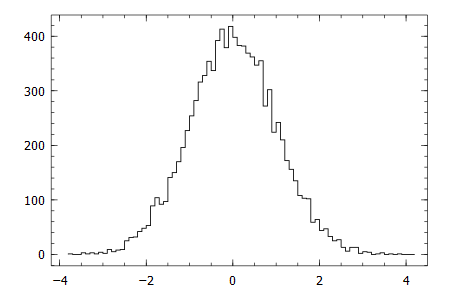

In [5]:
using Winston

a = randn(10000)
ha = hist(a,100)
plothist(ha)

### 5.4. Gaston
Данный пакет является фронтендом к [gnuplot](http://www.gnuplot.info). Для опытных пользователи UNIX-like ОС может оказаться весьма полезной штукой, хотя инвестировать в изучение gnuplot с нуля сейчас едва ли целесообразно. Работоспособность под Windows не проверялась. 

### 5.5. PGFPlots
Интерфейс к LaTeX-овскому пакету pgfplots.

### 5.6. PyPlot
Этот пакет является интерфейсом к matplotlib.pyplot. Соответственно, для работы нужен Python, [Matplotlib](http://matplotlib.org/) и все необходимые зависимости. Большое количество примеров использования можно найти в книге [QUANTITATIVE ECONOMICS with Julia](http://quant-econ.net/_static/pdfs/jl-quant-econ.pdf).

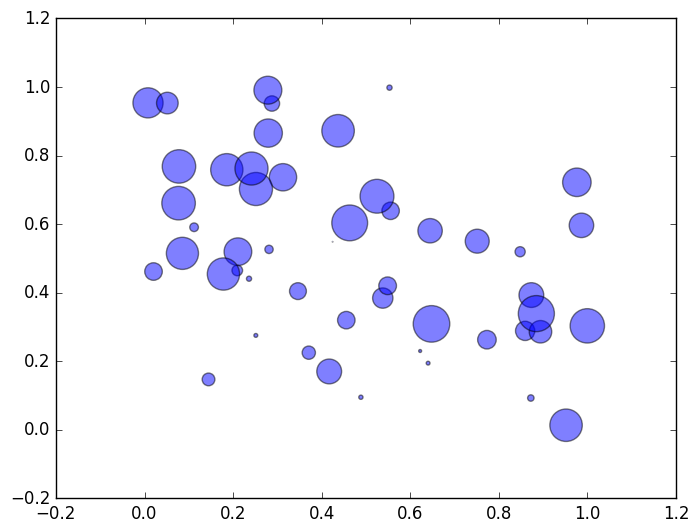

PyObject <matplotlib.collections.PathCollection object at 0x318B0B10>

In [1]:
using PyPlot
n = 50
srand(1)
x = rand(n)
y = rand(n)
area = pi .* (15 .* rand(n)).^2 
scatter(x, y, s=area, alpha=0.5)

### 5.7. Plotly
Интерфейс к [Plotly](https://plot.ly/) (plotly.js) - JavaScript-библиотеке для создания интерактивных графиков, построенной на основе d3.js и stack.gl (см. [Plotly: интерактивная графика для R и не только ](http://biostat-r.blogspot.com/2015/12/plotly-r.html)). Работает только в онлайн-режиме (требуется аккаунт на http://plot.ly) - вернее, не работает на Julia v.0.4.5 из-за проблем с авторизацией.

### 5.8. Bokeh
Написанная на Julia реализация Python-овской библиотеки [Bokeh](http://bokeh.pydata.org/en/latest/). Должна работать полностью автономно, но её возможности пока составляют лишь малую долю возможностей оригинала или реализации на R (см. [Bokeh: еще одна библиотека для создания интерактивной графики](http://biostat-r.blogspot.com/2016/01/bokeh.html)). На Julia v.0.4.5 в данный момент не работает.

### 5.9. Gadfly
Основной графический пакет для языка Julia. Стабильно работает, имеет обширную [документацию](http://gadflyjl.org/index.html).
Представляет собой реализацию "грамматики графики" по образу и подобию ggplot2. Наиболее заметное отличие: графики являются интерактивными.

Вызывать функцию **plot** можно тремя разными способами.

Первый способ - канонический для "грамматики графики". Первым аргументом передается таблица данных (DataFrame), далее через запятую перечисляются остальные аргументы, задающие соответствие между данными и их визуальным представлением. За это отвечают элементы **Stat**, **Geom**, **Scales**, **Scale** и **Guide**.

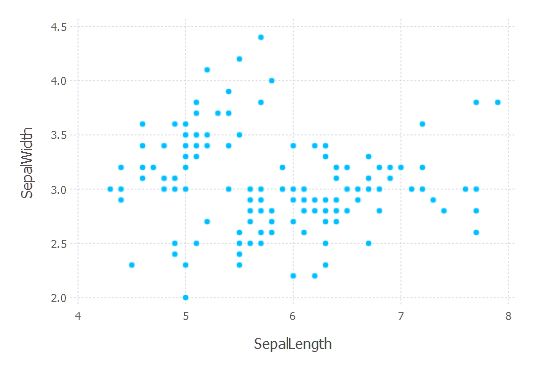

In [9]:
using Gadfly, RDatasets

plot(dataset("datasets", "iris"), x="SepalLength", y="SepalWidth", Geom.point)

Второй вариант предусматривает непосредственную передачу массивов в качестве аргументов.

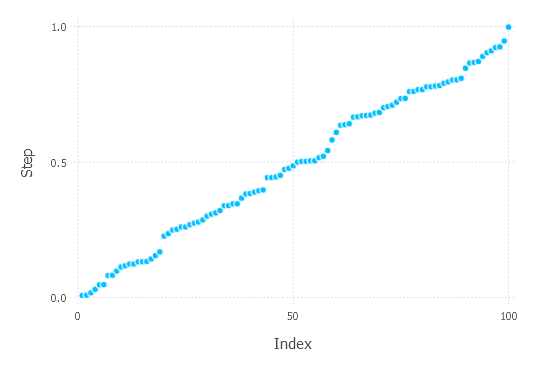

In [2]:
plot(x=collect(1:100), y=sort(rand(100)),
     Guide.XLabel("Index"), Guide.YLabel("Step"))

Третий вариант предназначен для отображения графиков функций.

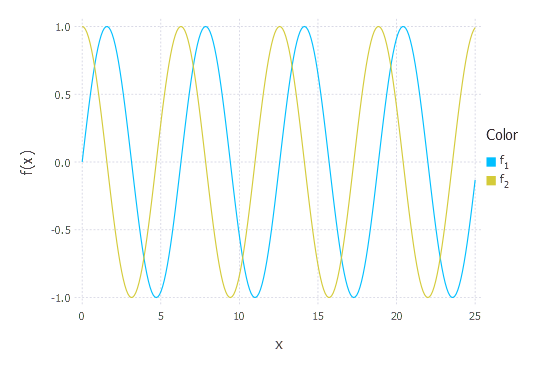

In [6]:
plot([sin, cos], 0, 25)

Графики можно создавать послойно, указав данные либо один раз для всех слоев, либо для каждого слоя отдельно, как это сделано в примере ниже. Этот пример также демонстрирует применение функции **Theme** для общей настройки вида слоя или графика.

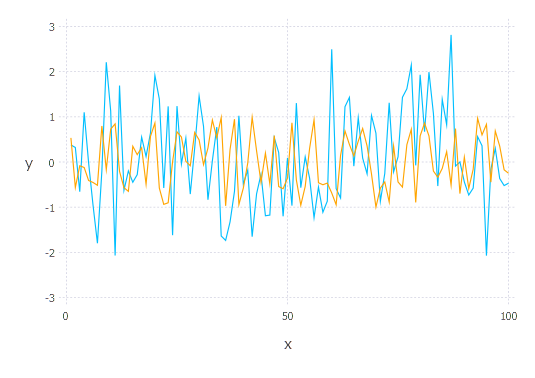

In [10]:
x = [1:100;];
y1 = 1 - 2*rand(100);
y2 = randn(100);
plot(
    layer(x=x, y=y1, Geom.line, Theme(default_color=colorant"orange")),
    layer(x=x, y=y2, Geom.line)
)

Вызов конкретных атрибутов Stat, Geom, Scales, Scale и Guide осуществляется с использованием точечного оператора, например, **Guide.xlabel("Angle")**.

Полный перечень атрибутов:

**Stat**:
* *Stat.step* - кусочно-постоянная интерполяция между точками
* *Stat.qq* - квантильный график
* *Stat.xticks* - вертикальные разделители на графике
* *Stat.нticks* - горизонтальные разделители на графике
* *Stat.x_jitter* - дополнительный "шум" (смещение точек) в вертикальном направлении
* *Stat.y_jitter* - дополнительный "шум" (смещение точек) в горизонтальном направлении
* *Stat.binmean* - средние значения y для средних значений x по квантилям на оси x

**Geom**:
* *Geom.boxplot* - ящик с усами
* *Geom.density* - функция ядерной плотности
* *Geom.errorbar* - столбцы ошибок
* *Geom.histogram* - гистограмма
* *Geom.bar* - столбчатая диаграмма
* *Geom.histogram2d* - 2D-гистограмма
* *Geom.hline* - горизонтальная линия
* *Geom.label* - метки точек
* *Geom.line* - линейный график
* *Geom.point* - точечный график
* *Geom.rectbin* - теплокарта (heatmap)
* *Geom.smooth* сглаживание (loess или lm)
* *Geom.subplot_grid* - "фасеточный" график с группировками по x и y
* *Geom.vline* - вертикальная линия
* *Geom.step* - эквивалент Geom.line с Stat.step
* *Geom.hexbin* - гексагональный график
* *Geom.ribbon* - летночный график
* *Geom.contour* - контурный 2D-график
* *Geom.path* - аналог Geom.line(preserve_order=true)
* *Geom.violin* - "скрипичный" график (2D-аналог ящика с усами)
* *Geom.polygon* - полигоны
* *Geom.beeswarm* - точечный график со смещениями по осям, чтобы избежать наложения

**Scale**:
* *Scale.y_continuous* - Scale.y_log10 и др. задают преобразования оси y
* *Scale.x_continuous* - Scale.y_log10 и др. задают преобразования оси x
* *Scale.y_discrete* - разметка оси y для дискретных значений
* *Scale.x_discrete* - разметка оси x для дискретных значений
* *Scale.ContinuousColorScale* - шкала цветов для сетки значений
* *Scale.continuous_color* - непрерывная шкала цветов
* *Scale.color_discrete* - дискретная шкала цветов
* *Scale.color_discrete_manual* - дискретная шкала цветов, заданная вручную
* *Scale.color_none* - отключает цветовую схему по умолчанию

**Guide**:
* *Guide.xlabel* - название оси x
* *Guide.ylabel* - название оси y
* *Guide.xticks* - разметка оси x
* *Guide.yticks* - разметка оси y
* *Guide.title* - заголовок графика
* *Guide.colorkey* - заголовок легенды
* *Guide.annotation* - наложение графических элементов 
* *Guide.manual_color_key* - создает легенду в ручном режиме